# DALL-E
paper： [Zero-Shot Text-to-Image Generation](http://proceedings.mlr.press/v139/ramesh21a.html)  
论文源码：[https://github.com/openai/DALL-E](https://github.com/openai/DALL-E)  
收录于：ICML 2021  
本 demo 参考于 Hugging Face 中的 [https://huggingface.co/kuprel/min-dalle](https://huggingface.co/kuprel/min-dalle)  

In [ ]:
import torch
from min_dalle import MinDalle

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model = MinDalle(
    models_root='./pretrained',  # 预训练模型的保存地址, 运行代码时自动从网上下载到这里, 即使该地址不存在都没事
                                 # 首次运行时需等待较长时间, 因为从网上下载预训练好的模型需要一些时间
    dtype=torch.float32,
    device='cuda:1',
    is_mega=False,  # True 表示使用dalle-mega, 大模型, 效果更好, 占用显存也多
                    # False表示使用dalle-mini, 小模型
                    # 由于显存限制，这里使用dalle-mini进行演示
    is_reusable=True
)

using device cuda:1
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [3]:
images = model.generate_images(
    text='a photo of an astronaut riding a horse on mars',  # 文本
    seed=-1,
    grid_size=3,               # 最终生成的图像为 grid_size*grid_size 个
    is_seamless=False,
    temperature=1,
    top_k=256,                 # 从生成的 top-k 个中再选择最贴合文本的 grid_size*grid_size 张图像
    supercondition_factor=16,
    is_verbose=False
)

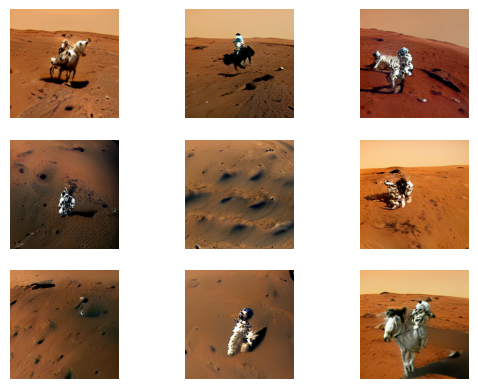

In [4]:
images = images.to('cpu').numpy()  # images.shape = (grid_size^2, 256, 256, 3)
num_image = images.shape[0]

# 显示图片
for i in range(num_image):
    image = Image.fromarray(np.uint8(images[i]))
    plt.subplot(int(num_image**0.5), int(num_image**0.5), i + 1)  #表示第i张图片，下标只能从1开始，不能从0
    plt.imshow(image)
    plt.axis('off')  # 去掉横纵坐标
plt.show()

In [5]:
# 保存图片
for i in range(images.shape[0]):
    image = Image.fromarray(np.uint8(images[i]))
    image.save('image_{}.png'.format(i))